# Python API

# Objective is to build a series of scatter plots to showcase the following relationships:

- Temperature (F) vs. Latitude
- Humidity (%) vs. Latitude
- Cloudiness (%) vs. Latitude
- Wind Speed (mph) vs. Latitude

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#Select Random Cities
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


616

In [3]:
# Create Dataframe to hold city data
city_data= pd.DataFrame({"City": cities})

# Change Format to include First Letter as Capital Letter
city_data["City"]= city_data["City"].str.title()

In [4]:
#Add Columns empty columns to dataframe
city_data['Cloudiness'] = ""
city_data['Country'] = ""
city_data['Humidity'] = ""
city_data['Lat'] = ""
city_data['Lng'] = ""
city_data['Max Temp'] = ""
city_data['Wind Speed'] = ""

city_data.head()

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ponta Do Sol,,,,,,,
1,Kavieng,,,,,,,
2,Sentyabrskiy,,,,,,,
3,Thompson,,,,,,,
4,Port Lincoln,,,,,,,


In [5]:
# Save configuration and build query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [6]:
from pprint import pprint

In [7]:
#print header 
print(f"Beginning Data Retrieval")
# get city from DataFrame

#use iterrows to iterate through pandas DataFrame
for index, row in city_data.iterrows():
    city_name = row['City']
   
    # assemble url and make API request
    response = requests.get(query_url + city_name).json()
    
    # Use exception handling in case any of our cities'  are missing
    # NOTE: if our code hits a KeyError or IndexError on ANY of the lines of code below, it will skip any unexecuted code and move to the next iteration
    try: 
        print(f"Processing Record {index} |{city_name}")
        
        city_data.loc[index, 'Cloudiness'] =  response['clouds']['all']
        city_data.loc[index, 'Country'] =  response['sys']['country']
        city_data.loc[index, 'Humidity'] = response['main']['humidity']
        city_data.loc[index, 'Lat'] =   response['coord']['lat']
        city_data.loc[index, 'Lng'] = response['coord']['lon']
        city_data.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_data.loc[index, 'Wind Speed'] = response['wind']['speed']
       
    except (KeyError, IndexError):
        print("City not found. Skipping")

Beginning Data Retrieval
Processing Record 0 |Ponta Do Sol
Processing Record 1 |Kavieng
Processing Record 2 |Sentyabrskiy
City not found. Skipping
Processing Record 3 |Thompson
Processing Record 4 |Port Lincoln
Processing Record 5 |Varhaug
Processing Record 6 |Polewali
Processing Record 7 |Castro
Processing Record 8 |Maldonado
Processing Record 9 |Mataura
Processing Record 10 |Natal
Processing Record 11 |Bella Union
Processing Record 12 |Barrow
Processing Record 13 |Ushuaia
Processing Record 14 |Hami
Processing Record 15 |Cape Town
Processing Record 16 |Baghdad
Processing Record 17 |Pevek
Processing Record 18 |Hithadhoo
Processing Record 19 |Aklavik
Processing Record 20 |Torbay
Processing Record 21 |Verkhoyansk
Processing Record 22 |Punta Arenas
Processing Record 23 |Nouadhibou
Processing Record 24 |Belyy Yar
Processing Record 25 |Taolanaro
City not found. Skipping
Processing Record 26 |Middle Island
Processing Record 27 |Lata
Processing Record 28 |Gorontalo
Processing Record 29 |Zhiga

In [8]:
# View Dataframe with fill empty columns
city_data.head()

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ponta Do Sol,40,PT,52,32.67,-17.1,68,21.92
1,Kavieng,100,PG,82,-2.57,150.8,79.97,11.52
2,Sentyabrskiy,,,,,,,
3,Thompson,90,CA,67,55.74,-97.86,21.2,16.11
4,Port Lincoln,72,AU,66,-34.73,135.87,60.75,11.74


In [9]:
#Save Data to csv & display your updated DataFrame
city_data.to_csv("city_data.csv")

Convert Raw Data to DataFrame
Export the city data into a .csv.
Display the DataFrame

In [10]:
city_data.count()

City          616
Cloudiness    616
Country       616
Humidity      616
Lat           616
Lng           616
Max Temp      616
Wind Speed    616
dtype: int64

In [53]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 8 columns):
City          592 non-null object
Cloudiness    592 non-null object
Country       592 non-null object
Humidity      592 non-null object
Lat           592 non-null object
Lng           592 non-null object
Max Temp      592 non-null object
Wind Speed    592 non-null object
dtypes: object(8)
memory usage: 37.1+ KB


In [24]:
#drop rows with na values
city_data= city_data.dropna(how='any',axis=1) 
city_data.isnull().sum()

City          0
Cloudiness    0
Country       0
Humidity      0
Lat           0
Lng           0
Max Temp      0
Wind Speed    0
dtype: int64

In [29]:
#Change to float
city_data.info()
city_data['Lat'] = pd.to_numeric(city_data['Lat'],errors='coerce')
city_data['Lat']= city_data['Lat'].astype(float)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616 entries, 0 to 615
Data columns (total 8 columns):
City          616 non-null object
Cloudiness    616 non-null object
Country       616 non-null object
Humidity      616 non-null object
Lat           567 non-null float64
Lng           616 non-null object
Max Temp      616 non-null object
Wind Speed    616 non-null object
dtypes: float64(1), object(7)
memory usage: 63.3+ KB


In [30]:
#Change to float
city_data.info()
city_data['Max Temp'] = pd.to_numeric(city_data['Max Temp'],errors='coerce')
city_data['Max Temp']= city_data['Max Temp'].astype(float)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616 entries, 0 to 615
Data columns (total 8 columns):
City          616 non-null object
Cloudiness    616 non-null object
Country       616 non-null object
Humidity      616 non-null object
Lat           567 non-null float64
Lng           616 non-null object
Max Temp      616 non-null object
Wind Speed    616 non-null object
dtypes: float64(1), object(7)
memory usage: 63.3+ KB


In [31]:
#Change to float
city_data.info()
city_data['Humidity'] = pd.to_numeric(city_data['Humidity'],errors='coerce')
city_data['Humidity']= city_data['Humidity'].astype(float)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616 entries, 0 to 615
Data columns (total 8 columns):
City          616 non-null object
Cloudiness    616 non-null object
Country       616 non-null object
Humidity      616 non-null object
Lat           567 non-null float64
Lng           616 non-null object
Max Temp      567 non-null float64
Wind Speed    616 non-null object
dtypes: float64(2), object(6)
memory usage: 63.3+ KB


In [32]:
#Change to float
city_data.info()
city_data['Wind Speed'] = pd.to_numeric(city_data['Wind Speed'],errors='coerce')
city_data['Wind Speed']= city_data['Wind Speed'].astype(float)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616 entries, 0 to 615
Data columns (total 8 columns):
City          616 non-null object
Cloudiness    616 non-null object
Country       616 non-null object
Humidity      567 non-null float64
Lat           567 non-null float64
Lng           616 non-null object
Max Temp      567 non-null float64
Wind Speed    616 non-null object
dtypes: float64(3), object(5)
memory usage: 63.3+ KB


In [35]:
#Change to float
city_data.info()
city_data['Cloudiness'] = pd.to_numeric(city_data['Cloudiness'],errors='coerce')
city_data['Cloudiness']= city_data['Cloudiness'].astype(float)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567 entries, 0 to 615
Data columns (total 8 columns):
City          567 non-null object
Cloudiness    567 non-null float64
Country       567 non-null object
Humidity      567 non-null float64
Lat           567 non-null float64
Lng           567 non-null object
Max Temp      567 non-null float64
Wind Speed    567 non-null float64
dtypes: float64(5), object(3)
memory usage: 39.9+ KB


In [38]:
city_data= city_data.dropna(how='any')

City          0
Cloudiness    0
Country       0
Humidity      0
Lat           0
Lng           0
Max Temp      0
Wind Speed    0
dtype: int64

Plotting the Data
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

Plotting the Data
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

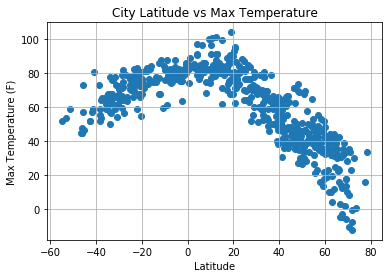

In [39]:
#Latitude vs Temperature
plt.scatter(city_data["Lat"], city_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/CityLatitudevsMaxTemperature.png")

# Show plot
plt.show()

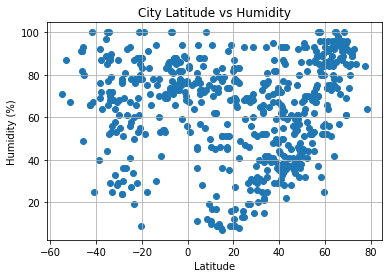

In [40]:
#Latitude vs Humidity Plot 
plt.scatter(city_data["Lat"], city_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/CityLatitudevsHumidity.png")

# Show plot
plt.show()

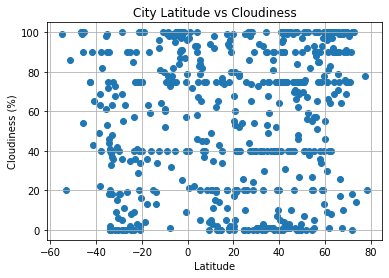

In [41]:
#Latitude vs Cloudiness Plot 
plt.scatter(city_data["Lat"], city_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/CityLatitudevsCloudiness.png")

# Show plot
plt.show()

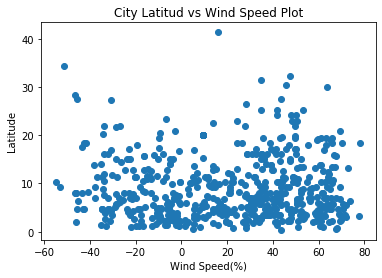

In [136]:
#Latitude vs Wind Speed Plot
plt.scatter(city_data["Lat"], city_data['Wind Speed'], marker= "o" )

#Incorporate the other graph properties
plt.title("City Latitud vs Wind Speed Plot")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed(%)")

#Save the figure
plt.savefig("Images/CityLatitudevsWindSpeed.png")

#Show plot
plt.show()